# Default Finance

This is a forecasting project, here our main objective is to create an automatic model that can predict, based on the customer's bank data, whether or not it can generate default with the bank.

## Problem introducion

The financial market has a wide range of products, but the main one is the bank loan, where an agreement is made between the bank and the customer, where you take a certain amount with the promise to pay in the future, plus interest and, often in pre-defined installments

### What is a bank default?

In finance, delinquency is the failure to fulfill the legal obligations of a loan, for example, when a home buyer fails to pay a mortgage or when a bank customer fails to repay a bank loan.

### Explaining the delinquency

Default is the failure to pay a debt, including interest or principal, on a loan or security. A default can occur when a borrower fails to make payments on time, misses payments, or avoids or stops making payments. Individuals, companies and even countries can default if they fail to meet their debt obligations. Default risks are usually calculated well in advance by creditors.

## Import Libries

For this project is necessary utilizate the five libraries describe bellow, where each one have your pursose.
- Pandas - For modeling data, tranforming matrixes, list or arrays in dataframe (something like tables of Excel).
- Numpy - Perform calculations on single or multidimensional arrays in a simple way.
- Matplotlib and Seaborn - Libraries utilizate to data visualization with graphs, enabling data analyse and understanding the problem, enabling the creation of a solution.
- Sklearn - Library to work with Machine Learning, with it several methods, algorithms and very interesting techniques are already implemented that simplify 
- Statsmodels - Is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [431]:
# Perform calculations on multidimensional arrays 
import numpy as np

# Data modeling
import pandas as pd

# For lead time
import time

# Plotting graphics 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Model performance analysis
from sklearn import metrics

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Metrics for score the model
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

# Create a stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data Exploration

### Data acquisition

Using Pandas it is possible to read a .CSV file and transform our database into a dataframe, being able to perform data modeling later.
In this case, a facilitator is the presence of a column with the encoding of each wine in the read file (Id), so it is possible to use this column as an index of the dataframe.

In [432]:
data = pd.read_csv('Default_Fin.csv',index_col='Index')
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0


### Data Analyse

First, to understand the database studied, it is important to check which variables are studied and if they all have the same amount of information. Because, if you don't have it, it is necessary to carry out the processing of the data to continue with the activities.
Fortunately, in this case it will not be necessary, as we find 12 columns with the same amount of information.

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


In [434]:
data.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


After using .decribe(), which has the function of demonstrating the main characteristics of each DataFrame column, we can already see some things, such as:
- Primary statistical data that already give an idea of ​​each variable
- Variation in the magnitude of each variable

To understand the relationship between the variables a little better, we can use relplot() to perform this visualization.

<Figure size 432x288 with 0 Axes>

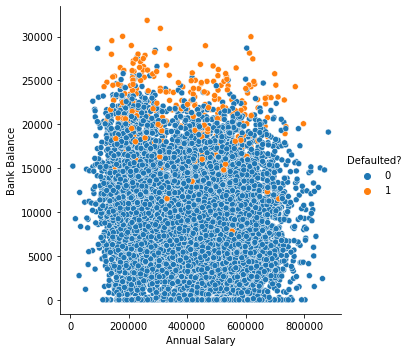

In [435]:
from matplotlib import rcParams
plt.figure()
sns.relplot(data=data, x=data['Annual Salary'],y=data['Bank Balance'], hue=data['Defaulted?'])
plt.show()

But getting a little visible that the higher the bank balance, the greater the chance of default, but it is important to quantify and verify if the parameters of annual salary and employed are important.

### Data Preparation

For the set of variables of a distinct set, different the resource to find the necessary degree of development, the variable answer, that is, a variable used as a template for applied methodology.

In [436]:
#manually add the intercept
data['intercept'] = 1.0

In [437]:
# Putting feature variable to feat
feat = data.drop(['Defaulted?'],axis=1)

# Putting response variable to resp
resp = data['Defaulted?']

## Building a predict model

### What is Logic Regression?

Logistic regression is a statistical technique that aims to produce, from a set of observations, a model that allows the prediction of values ​​taken by a categorical variable, often binary, from a series of continuous and/or continuous explanatory variables. binary.

Logistic regression is widely used in medical and social sciences, and has other names such as logistic model, logit model, and maximum likelihood classifier, it is used iteratively to find the most likely estimates for the coefficients.

The success of logistic regression is mainly based on the numerous tools that allow the in-depth interpretation of the results obtained.

Logistic regression is used in machine learning (ML) to help create accurate predictions. It is similar to linear regression, except that instead of a graphical result, the target variable is binary; the value is 1 or 0.

There are two types of measurables, the explanatory variables/characteristics (item being measured) and the response variable/target binary variable, which is the outcome.

There are three basic types of logistic regression:
- Binary logistic regression: here, there are only two possible outcomes for the categorical answer.
- Multinomial logistic regression: this is where the response variables can include three or more variables, which will not be in any order.
- Ordinal logistic regression: Like multinomial regression, there can be three or more variables. However, there is an order that measurements follow.

![Logistic](images/logistic-regression-diagram.svg)

### Logic Regression Apliccation

Now that the data has been prepared, you can build and train the random forest model.

In [438]:
mLogit = sm.Logit(resp,feat)
mLogit_res = mLogit.fit()
print('-------------------------------------------------------')
print('                   Regression Summary')
print('-------------------------------------------------------')
mLogit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
-------------------------------------------------------
                   Regression Summary
-------------------------------------------------------


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: Defaulted?       AIC:              1579.5447  
Date:               2022-02-06 20:35 BIC:              1608.3860  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2572e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Employed         0.6468   0.2363   2.7376 0.0062   0.1837   1.1098
Bank Balance     0.0005   0.0000  24.7365 0.0000   0.0004   0.0005
Annual Salary    0.0000   0.0000   0.3698 0.7115  -0.0000   0.0000
intercept      -11.5158   0.4379 -26.2987 0.0000 -12.3741 -10.6576
==================================================================

"""

We have p significance of Annual Salary greater than 0.05, that is, the variable does not present statistical significance compared to the other variables, we can thus remove it from our analysis, obtaining a model with greater focus on what matters

In [439]:
data = data.drop('Annual Salary',axis=1)

In [440]:
#performing the regression
mLogit = sm.Logit(data['Defaulted?'],train_cols)
#fit the model
mLogit_res = mLogit.fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [441]:
mLogit = sm.Logit(data['Defaulted?'],train_cols)
mLogit_res = mLogit.fit()
print('-------------------------------------------------------')
print('                   Regression Summary')
print('-------------------------------------------------------')
mLogit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10
-------------------------------------------------------
                   Regression Summary
-------------------------------------------------------


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: Defaulted?       AIC:              1577.6814  
Date:               2022-02-06 20:35 BIC:              1599.3124  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1892e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Employed         0.7149   0.1475   4.8459 0.0000   0.4257   1.0040
Bank Balance     0.0005   0.0000  24.7485 0.0000   0.0004   0.0005
intercept      -11.4644   0.4145 -27.6563 0.0000 -12.2768 -10.6519
==================================================================

"""

Here we can observe a statistical significance of 100% between the variables and their coefficients.

Set the params in variable to future use

In [476]:
par_int = mLogit_res.params[2]
par_emp = mLogit_res.params[0]
par_ban = mLogit_res.params[1]

## Score the model

With the model trained to learn the relationships between resources and destinations, the next step is to find out how good the model is.

To do this, it is necessary to create predictions about the test features and then compare the predictions with the already known answers, being able to calculate the accuracy of our model.

In [444]:
Q = mLogit.predict(mLogit_res.params,linear=True)

Para entender se nosso modelo está aderente e confiável, foi realizado 3 critérios de análise:
- ROC curve: is a graphical representation that illustrates the performance of a binary classifier system as its discrimination threshold varies. That is, the closer to the central diagonal line, the lower the accuracy of our model.
- Waste analysis: The residuals indicate the natural variation of the data, a random factor (or not) that the model did not capture. If the model's assumptions are violated, the analysis will lead to dubious and unreliable results for inference.
- Cook's distance: Cook's distance is a measure of the influence of an observation when performing a least squares regression analysis



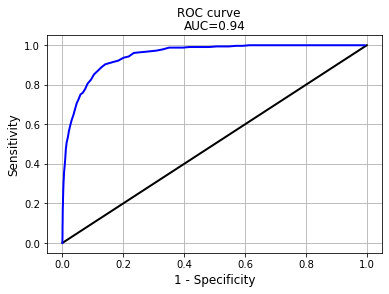

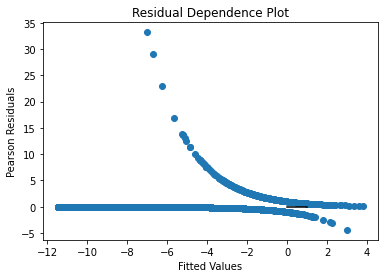

In [445]:
## Calculate sensitivity and specificity
S = np.linspace(min(Q), max(Q), 100)
Sens = np.zeros(len(S), dtype=np.float64)
Spec = np.zeros(len(S), dtype=np.float64)
i1 = np.flatnonzero(data['Defaulted?'] == 1)
i0 = np.flatnonzero(data['Defaulted?'] == 0)
for i,s in enumerate(S):
    Sens[i] = np.mean(Q[i1] > s)
    Spec[i] = np.mean(Q[i0] <= s)

#calculate the AUC using the trapezoidal rule
auc = 0.
for i in range(1,len(Sens)):
    auc += (Spec[i]-Spec[i-1]) * (Sens[i] + Sens[i-1])/2

#plot the ROC curve
plt.clf()
plt.grid(True)
plt.plot([0,1], [0,1], '-', color='black', lw=2)
plt.plot(1-Spec, Sens, '-', color='blue', lw=2)
plt.xlabel("1 - Specificity", size=12)
plt.ylabel("Sensitivity", size=12)
plt.title("AUC=%.2f" % auc)
plt.suptitle("ROC curve")
plt.show()

# Waste analysis
plt.figure()
plt.scatter(Q,mLogit_res.resid_pearson)
plt.plot([0.0,1.0],[0.0,0.0],'k-')
plt.title('Residual Dependence Plot')
plt.ylabel('Pearson Residuals')
plt.xlabel('Fitted Values')
plt.show()

And after the analysis, it is possible to affirm that the model was statistically very faithful and reliable for use, since it presented an accuracy of 94% and extremely faithful to the initial data.

## Discretize the probability equation

And after creating the model for predicting the event, it is possible to calculate the eventual probability in light of the customer's inputs. Therefore, with the resources found, it is possible to describe the following function:

\begin{equation*}
P = \frac{1}{1 + e^{-a+bX}}
\end{equation*}

Being:
- p the probability of the event
- a is a model interpretation constant
- b the resource constant found after creating the predictive model
- X the input variables, in this case, the customer's bank details

Therefore, it is possible to describe a possibility.
This was created as a function, in this way it is possible to call it for queries and perform the independent entries of the client for analysis.

In [478]:
def p_event(par_int,par_emp,par_ban,Emp,Ban_Bal):
    event = (1/(1+np.exp(-((par_int)+(par_emp*Emp)+(par_ban*Ban_Bal)))))
    return event

## Predict model run!

Finally, we have our predictive model, extremely reliable, built, in this way, we only need to enter the customer's data and we will have the probability of default of the same, being at the bank's discretion whether or not to make the loan to the same, depending on its risk analysis.

In [479]:
a = 0
while a == 0:
    Emp = input("Is the Customer an employee?").lower()
    if Emp == ("yes"):
        Emp = 1
        a = 1
    elif Emp == ("no"):
        Emp = 0
        a = 1
    else:
        print("Please answer with yes or no")

b=0        
while b == 0:
    Ban_Bal = input("What is the customer's back balance? $")
    try:
        Ban_Bal = int(Ban_Bal)
        b = 1
    except ValueError:
        print("Entre com um número inteiro. Ex: 20000")

Is the Customer an employee? yes
What is the customer's back balance? $ 12000


In [480]:
print("Probability of default is: {:.4}%".format(p_event(par_int,par_emp,par_ban,Emp,Ban_Bal)*100))

Probability of default is: 0.6618%
